In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
dat = pd.read_csv('/content/drive/MyDrive/ma346/vgsales.csv')
dat

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [34]:
#Getting summary statistics
dat[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.537441
std,0.816683,0.505351,0.309291,1.555028
min,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.170000
75%,0.240000,0.110000,0.040000,0.470000
max,41.490000,29.020000,10.220000,82.740000


In [4]:
#Looking at the amount of games in each genre
genre_count = dat['Genre'].value_counts()
genre_count

,count
Genre,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


In [5]:
dat.info() #Some missing values in year and genre,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
#Creating the decade column for further use (including 2020 in the 2010 decade because there is only one record)
dat['decade'] = 0
dat.loc[((dat['Year'] >= 1980)&(dat['Year'] < 1990)), 'decade'] = 1980
dat.loc[((dat['Year'] >= 1990)&(dat['Year'] < 2000)), 'decade'] = 1990
dat.loc[((dat['Year'] >= 2000)&(dat['Year'] < 2010)), 'decade'] = 2000
dat.loc[((dat['Year'] >= 2010)&(dat['Year'] <= 2020)), 'decade'] = 2010

In [7]:
#Looking to see what the rows missing year were
print(dat['decade'].value_counts())
dat.loc[dat['decade']==0]

decade
2000    9208
2010    5145
1990    1769
0        271
1980     205
Name: count, dtype: int64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decade
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,0
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,0
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17,0
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,0
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,0
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,0
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,0
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,0


In [8]:
#Calculating the total global sales in each genre
genre_gsale_sum = dat.groupby(['Genre'])['Global_Sales'].sum()
genre_gsale_sum = genre_gsale_sum.reset_index()
genre_gsale_sum = genre_gsale_sum.sort_values(by='Global_Sales', ascending=False)
genre_gsale_sum

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


In [42]:
#calculating the mean global sales in each genre
genre_gsale_mean = dat.groupby('Genre')['Global_Sales'].agg('mean')
genre_gsale_mean = genre_gsale_mean.reset_index()
genre_gsale_mean = genre_gsale_mean.sort_values(by='Global_Sales', ascending=False)
genre_gsale_mean

,Genre,Global_Sales
4,Platform,0.938341
8,Shooter,0.791885
7,Role-Playing,0.623233
6,Racing,0.586101
10,Sports,0.567319
2,Fighting,0.529375
0,Action,0.528100
3,Misc,0.465762
9,Simulation,0.452364
5,Puzzle,0.420876


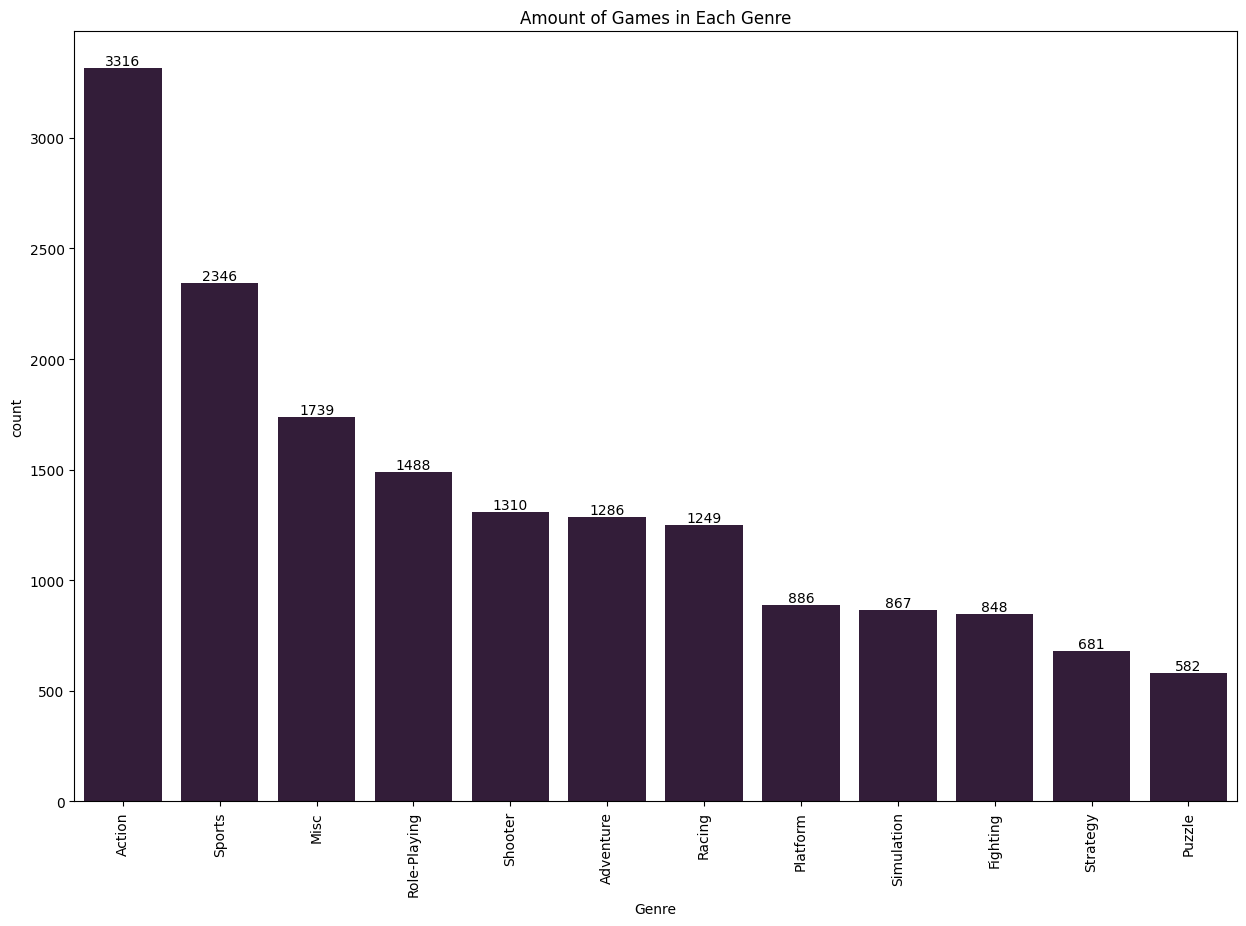

In [39]:
#Graph showing amount of games in each genre
sns.set_palette('rocket')
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="Genre", data=dat, order = dat['Genre'].value_counts().index)
ax.set_title('Amount of Games in Each Genre')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

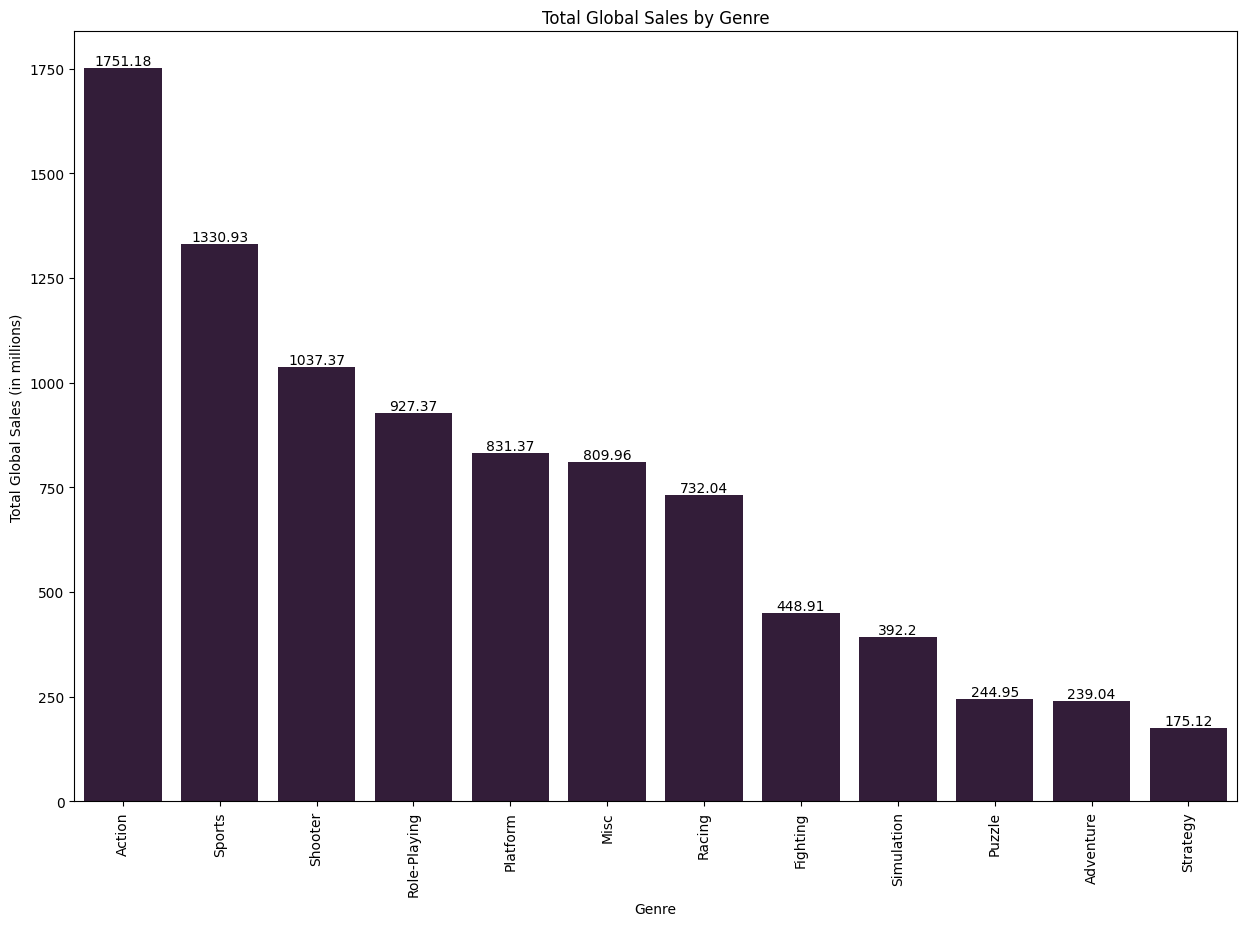

In [40]:
#Graph showing the total global sales in each genre
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Genre', y='Global_Sales', data=genre_gsale_sum)
ax.set_title('Total Global Sales by Genre')
ax.set_ylabel('Total Global Sales (in millions)')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

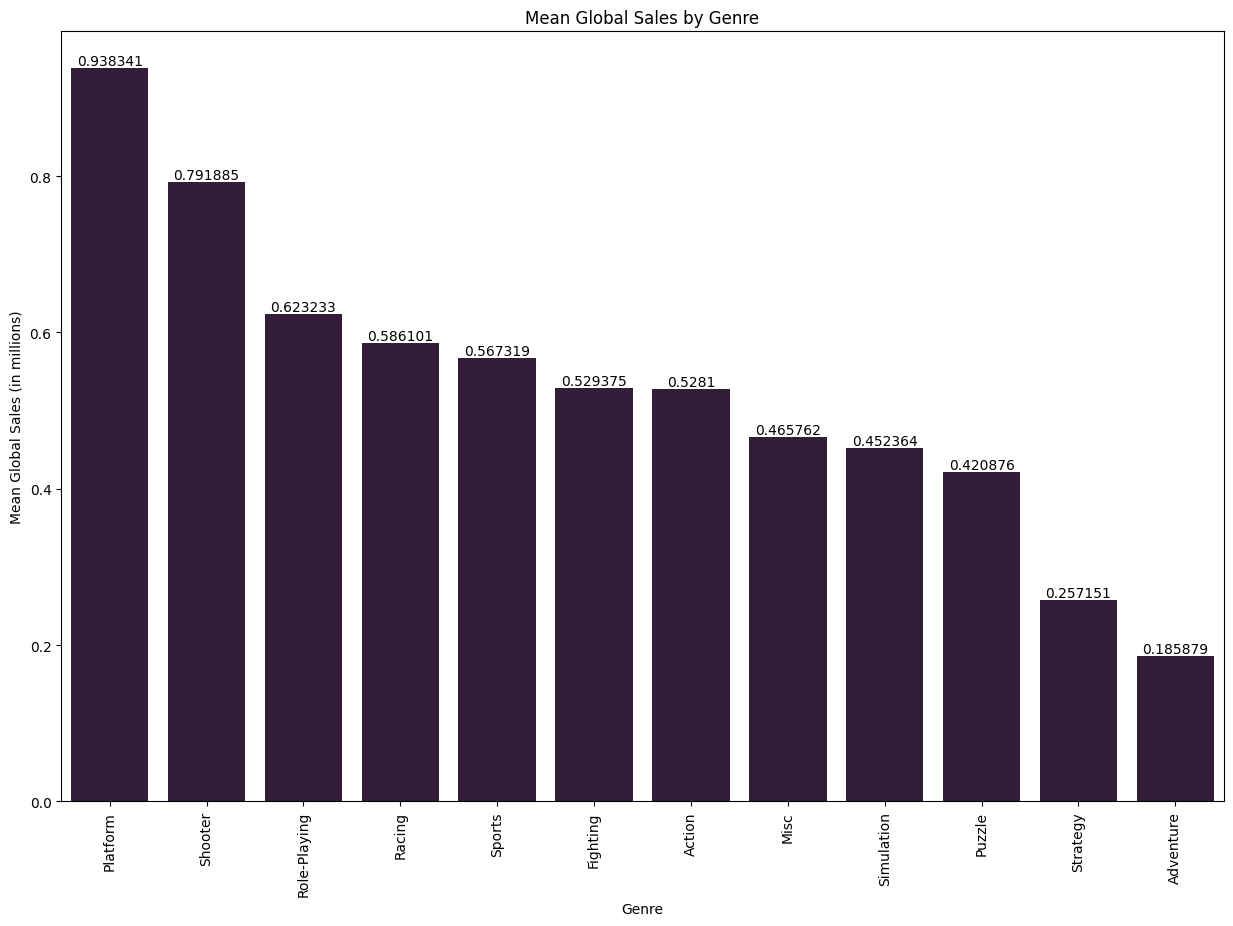

In [43]:
#Same graph as above, except it's the mean sales in each genre
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Genre', y='Global_Sales', data=genre_gsale_mean)
ax.set_title('Mean Global Sales by Genre')
ax.set_ylabel('Mean Global Sales (in millions)')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [51]:
#looking at the top genre
dat.loc[dat['Genre']=='Platform']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,decade
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2000
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,1990
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,1980
...,...,...,...,...,...,...,...,...,...,...,...,...
16498,16501,The Land Before Time: Into the Mysterious Beyond,GBA,2006.0,Platform,Game Factory,0.01,0.00,0.00,0.00,0.01,2000
16562,16565,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01,2010
16565,16568,Teslagrad,PSV,2015.0,Platform,Rain Games,0.00,0.01,0.00,0.00,0.01,2010
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,2000


In [13]:
#Creating a table with the total sales in each region for each genre
sales_by_region = dat[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales']].groupby('Genre').sum()
sales_by_region

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,877.83,525.00,159.95
Adventure,105.80,64.13,52.07
Fighting,223.59,101.32,87.35
Misc,410.24,215.98,107.76
Platform,447.05,201.63,130.77
Puzzle,123.78,50.78,57.31
Racing,359.42,238.39,56.69
Role-Playing,327.28,188.06,352.31
Shooter,582.60,313.27,38.28


In [14]:
#Preparing this table for a side-by-side histogram
sales_by_region = sales_by_region.reset_index()
sales_by_region = pd.melt(sales_by_region, id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='region', value_name='tot_sales')
sales_by_region

,Genre,region,tot_sales
0,Action,NA_Sales,877.83
1,Adventure,NA_Sales,105.80
2,Fighting,NA_Sales,223.59
3,Misc,NA_Sales,410.24
4,Platform,NA_Sales,447.05
5,Puzzle,NA_Sales,123.78
6,Racing,NA_Sales,359.42
7,Role-Playing,NA_Sales,327.28
8,Shooter,NA_Sales,582.60
9,Simulation,NA_Sales,183.31


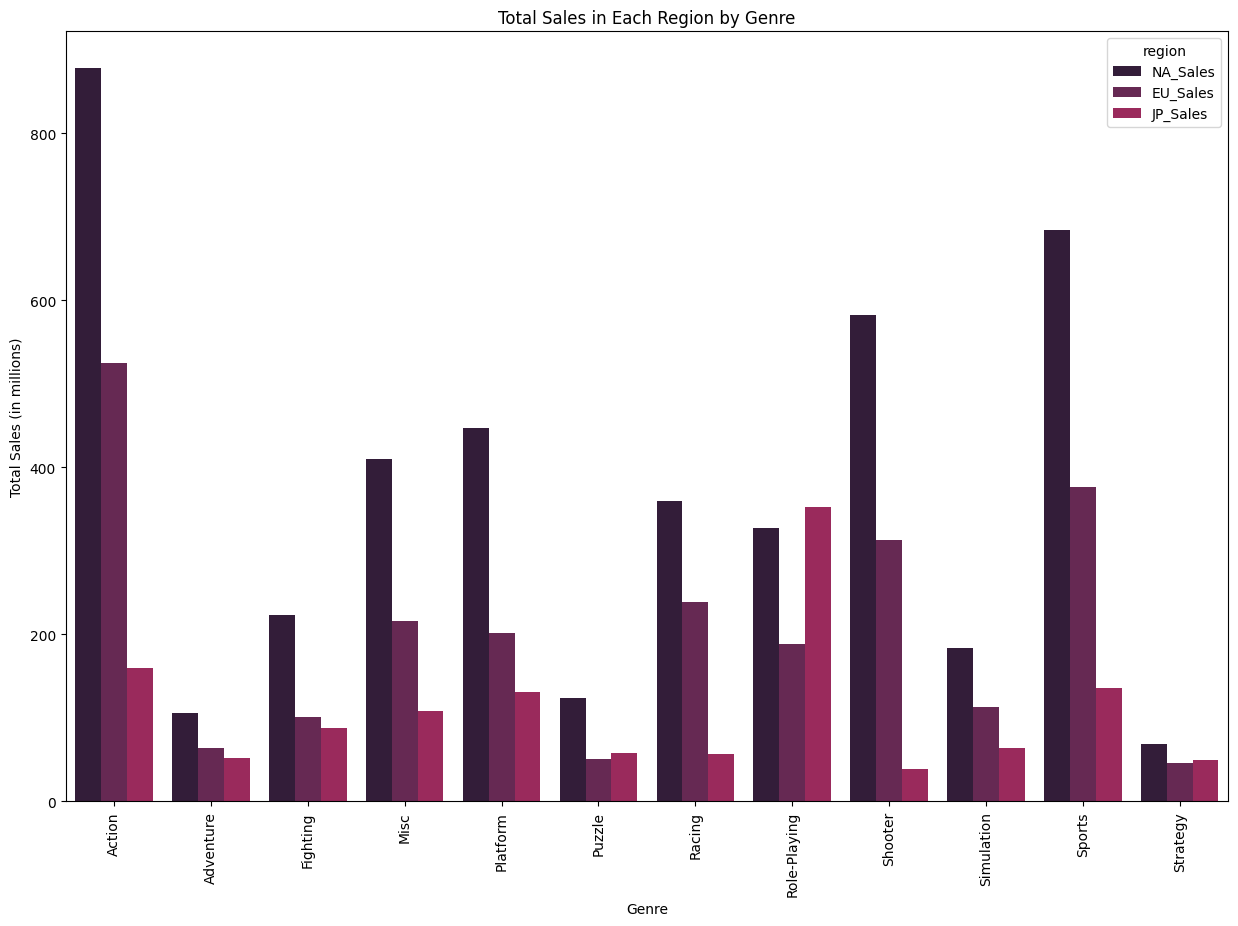

In [15]:
#Graph showing the total global sales in each genre
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Genre', y='tot_sales', data=sales_by_region, hue='region', hue_order=['NA_Sales', 'EU_Sales', 'JP_Sales'])
ax.set_title('Total Sales in Each Region by Genre')
ax.set_ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

In [55]:
#Doing the same with mean
#Creating a table with the total sales in each region for each genre
mean_sales_by_region = dat[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales']].groupby('Genre').agg('mean')
mean_sales_by_region = mean_sales_by_region.reset_index()
mean_sales_by_region = pd.melt(mean_sales_by_region, id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='region', value_name='mean_sales')
mean_sales_by_region = mean_sales_by_region.sort_values('mean_sales', ascending=False)
mean_sales_by_region

,Genre,region,mean_sales
4,Platform,NA_Sales,0.504571
8,Shooter,NA_Sales,0.444733
10,Sports,NA_Sales,0.291283
6,Racing,NA_Sales,0.287766
0,Action,NA_Sales,0.264726
2,Fighting,NA_Sales,0.263667
20,Shooter,EU_Sales,0.239137
31,Role-Playing,JP_Sales,0.236767
3,Misc,NA_Sales,0.235906
16,Platform,EU_Sales,0.227573


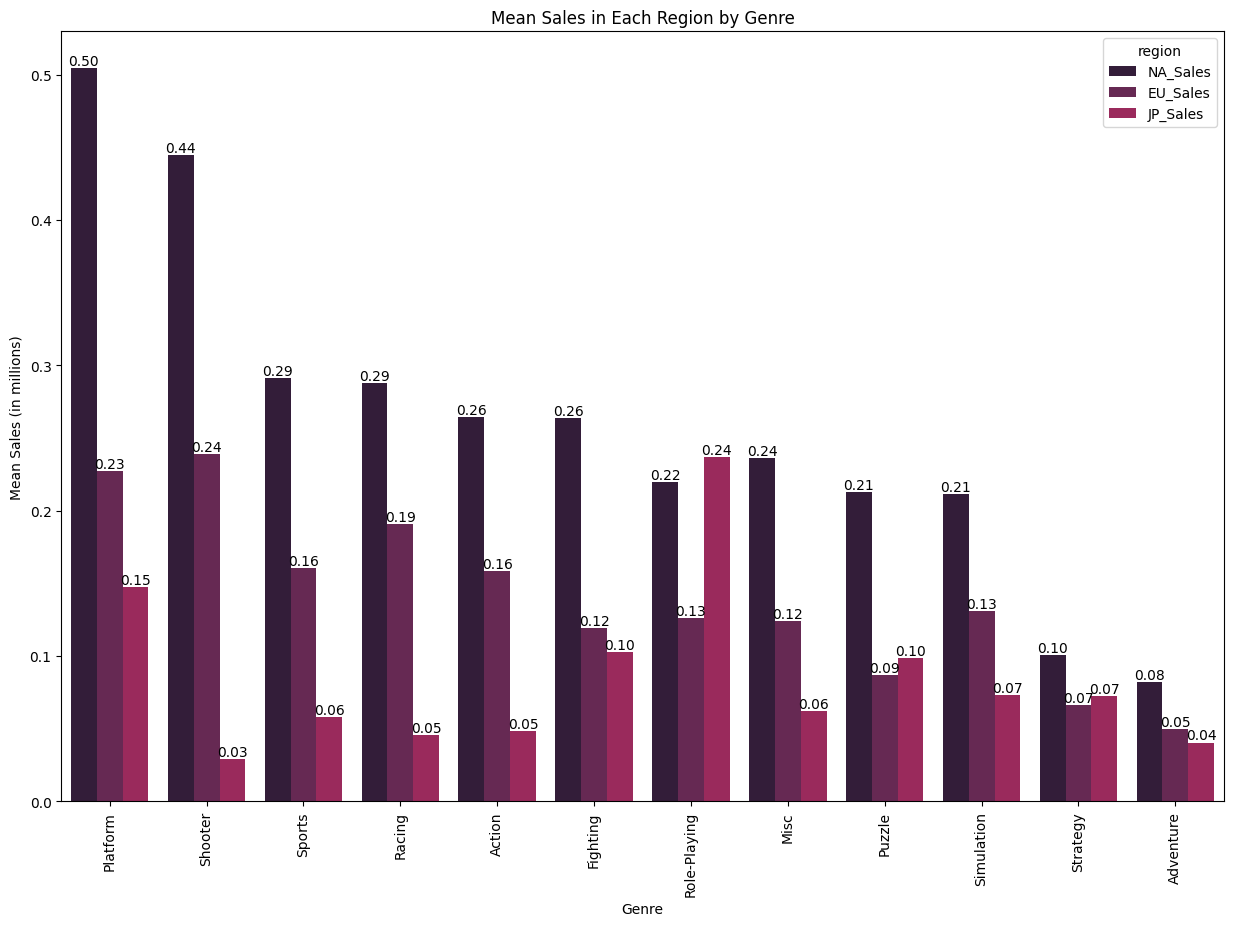

In [17]:
#Graph showing the total global sales in each genre
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Genre', y='mean_sales', data=mean_sales_by_region, hue='region', hue_order=['NA_Sales', 'EU_Sales', 'JP_Sales'])
ax.set_title('Mean Sales in Each Region by Genre')
ax.set_ylabel('Mean Sales (in millions)')
for container in ax.containers:
  ax.bar_label(container, fmt='{0:.2f}')
plt.xticks(rotation=90)
plt.show()

In [18]:
#Dropping rows missing a year released value since there is a miniscule amount (271 records)
sales_by_decade = dat.loc[dat['decade'] != 0]

#Looking at sales by decade
sales_by_decade = sales_by_decade[['decade', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].groupby('decade').sum()
sales_by_decade

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
decade,,,,
1980,235.66,31.20,102.49,376.58
1990,576.11,282.87,372.33,1278.91
2000,2408.91,1256.18,510.69,4644.02
2010,1112.75,838.87,298.79,2520.85


In [19]:
#Looking at the mean to get a better idea, since the amounts in each decade differ
mean_sales_by_decade = dat[['decade', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].groupby('decade').agg('mean')
mean_sales_by_decade

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
decade,,,,
0,0.219631,0.092288,0.024797,0.369299
1980,1.149561,0.152195,0.499951,1.836976
1990,0.325670,0.159904,0.210475,0.722956
2000,0.261611,0.136423,0.055462,0.504346
2010,0.216278,0.163046,0.058074,0.489961


In [20]:
#Making it usable for barplot function
sales_by_decade = sales_by_decade.reset_index()
melt_sales_by_decade = pd.melt(sales_by_decade, id_vars='decade', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='region', value_name='tot_sales')
melt_sales_by_decade

,decade,region,tot_sales
0,1980,NA_Sales,235.66
1,1990,NA_Sales,576.11
2,2000,NA_Sales,2408.91
3,2010,NA_Sales,1112.75
4,1980,EU_Sales,31.20
5,1990,EU_Sales,282.87
6,2000,EU_Sales,1256.18
7,2010,EU_Sales,838.87
8,1980,JP_Sales,102.49
9,1990,JP_Sales,372.33


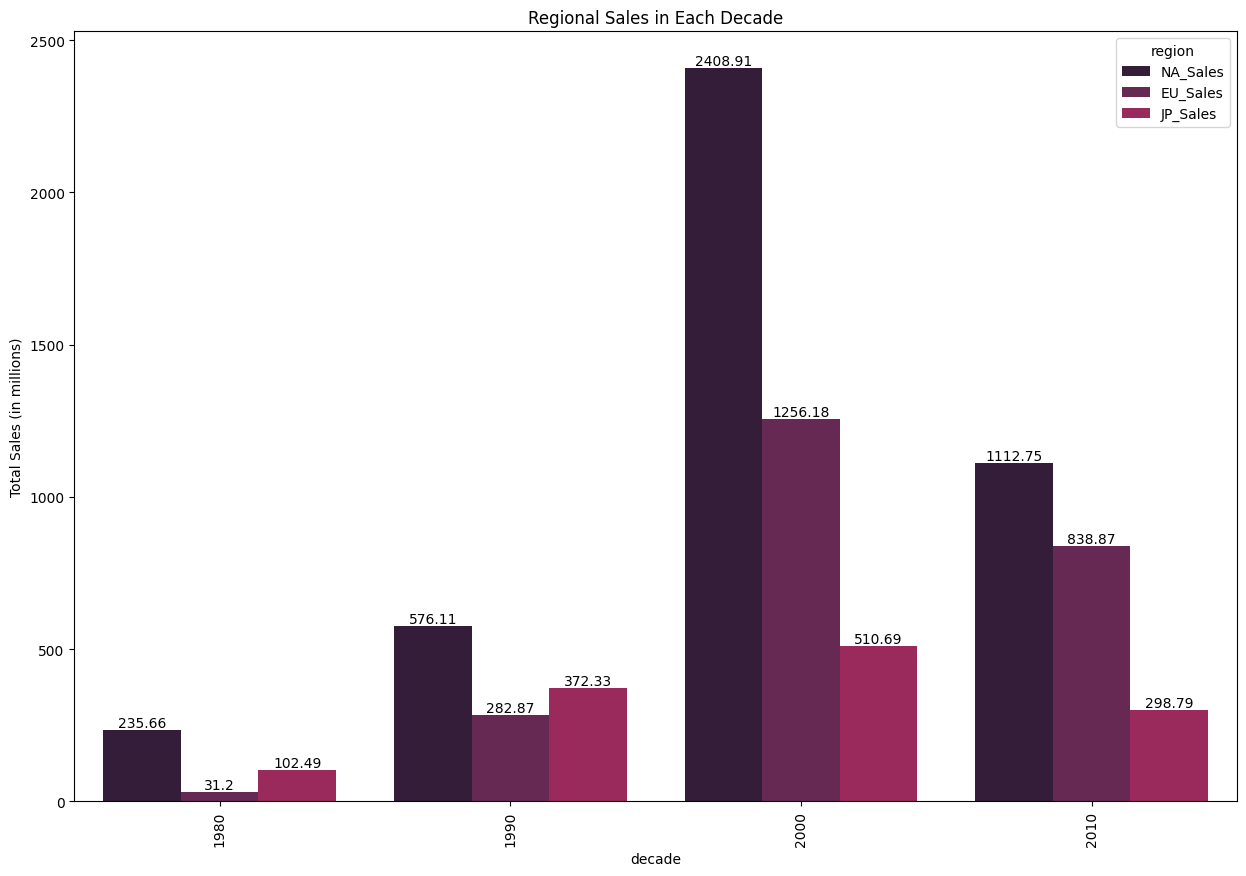

In [21]:
#Making the barplot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='decade', y='tot_sales', data=melt_sales_by_decade, hue='region', hue_order=['NA_Sales', 'EU_Sales', 'JP_Sales'])
ax.set_title('Regional Sales in Each Decade')
ax.set_ylabel('Total Sales (in millions)')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

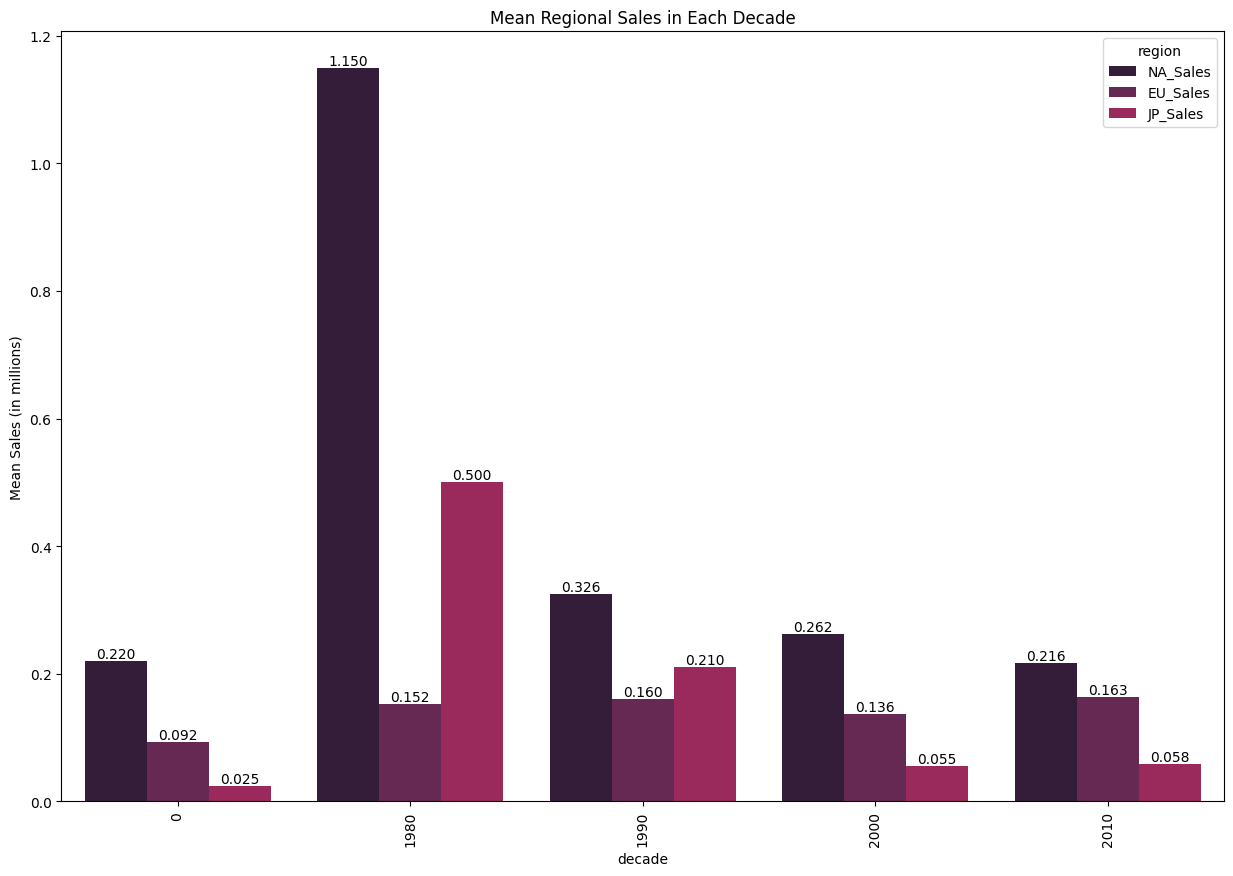

In [46]:
#Now looking at the mean sales
mean_sales_by_decade = mean_sales_by_decade.reset_index()
melt_meansales_by_decade = pd.melt(mean_sales_by_decade, id_vars='decade', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='region', value_name='mean_sales')
melt_meansales_by_decade

#Making the barplot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='decade', y='mean_sales', data=melt_meansales_by_decade, hue='region', hue_order=['NA_Sales', 'EU_Sales', 'JP_Sales'])
ax.set_title('Mean Regional Sales in Each Decade')
ax.set_ylabel('Mean Sales (in millions)')
for container in ax.containers:
    ax.bar_label(container, fmt='{0:.3f}')
plt.xticks(rotation=90)
plt.show()

In [23]:
#for the pop est, just grabbed first year from macrotrends.net

#1980 NA = 247,761,304
#1980 EU = 693,437,228
#1980 JP = 117,624,196

#1990 NA = 275,860,329
#1990 EU = 721,497,282
#1990 JP = 123,686,321

#2000 NA = 313,205,695
#2000 EU = 726,968,473
#2000 JP = 126,803,861

#2010 NA = 345,272,107
#2010 EU = 736,276,813
#2010 JP = 128,105,431

In [6]:
#Creating the new dataframe with adjusted sales/population
popdat = dat[['Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'decade']]
#dividing by population(in millions), rounded up
#na
popdat.loc[popdat['decade']==1980, 'NA_Sales'] = popdat['NA_Sales']/248
popdat.loc[popdat['decade']==1990, 'NA_Sales'] = popdat['NA_Sales']/276
popdat.loc[popdat['decade']==2000, 'NA_Sales'] = popdat['NA_Sales']/314
popdat.loc[popdat['decade']==2010, 'NA_Sales'] = popdat['NA_Sales']/346

#eu
popdat.loc[popdat['decade']==1980, 'EU_Sales'] = popdat['EU_Sales']/694
popdat.loc[popdat['decade']==1990, 'EU_Sales'] = popdat['EU_Sales']/722
popdat.loc[popdat['decade']==2000, 'EU_Sales'] = popdat['EU_Sales']/727
popdat.loc[popdat['decade']==2010, 'EU_Sales'] = popdat['EU_Sales']/737

#jp
popdat.loc[popdat['decade']==1980, 'JP_Sales'] = popdat['JP_Sales']/118
popdat.loc[popdat['decade']==1990, 'JP_Sales'] = popdat['JP_Sales']/124
popdat.loc[popdat['decade']==2000, 'JP_Sales'] = popdat['JP_Sales']/127
popdat.loc[popdat['decade']==2010, 'JP_Sales'] = popdat['JP_Sales']/129

#for records with no year data, I will fill them in with the mean population amount
popdat.loc[popdat['decade']==0, 'NA_Sales'] = popdat['NA_Sales']/((248+276+314+346)/4)
popdat.loc[popdat['decade']==0, 'EU_Sales'] = popdat['EU_Sales']/((694+722+727+737)/4)
popdat.loc[popdat['decade']==0, 'JP_Sales'] = popdat['JP_Sales']/((118+124+127+129)/4)

popdat

124.5

In [26]:
popdat.describe()

,NA_Sales,EU_Sales,JP_Sales,decade
count,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.000851,0.000201,0.000618,1969.132426
std,0.002777,0.000693,0.002473,253.784835
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2000.000000
50%,0.000255,0.000028,0.000000,2000.000000
75%,0.000761,0.000151,0.000310,2010.000000
max,0.132134,0.039917,0.082419,2010.000000


In [27]:
sumpopdat = popdat[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales']].groupby('Genre').sum()
sumpopdat

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,2.778109,0.718513,1.259743
Adventure,0.341137,0.088020,0.411623
Fighting,0.728780,0.139267,0.695420
Misc,1.287511,0.295987,0.851860
Platform,1.519950,0.277942,1.055459
Puzzle,0.434637,0.070124,0.462249
Racing,1.171558,0.327381,0.452595
Role-Playing,1.032127,0.257619,2.788627
Shooter,1.849893,0.428193,0.304887


In [28]:
sumpopdat = sumpopdat.reset_index()
sumpopdat = pd.melt(sumpopdat, id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='region', value_name='mean_sales')
sumpopdat = sumpopdat.sort_values('mean_sales', ascending=False)
sumpopdat

,Genre,region,mean_sales
31,Role-Playing,JP_Sales,2.788627
0,Action,NA_Sales,2.778109
10,Sports,NA_Sales,2.173786
8,Shooter,NA_Sales,1.849893
4,Platform,NA_Sales,1.519950
3,Misc,NA_Sales,1.287511
24,Action,JP_Sales,1.259743
6,Racing,NA_Sales,1.171558
34,Sports,JP_Sales,1.082841
28,Platform,JP_Sales,1.055459


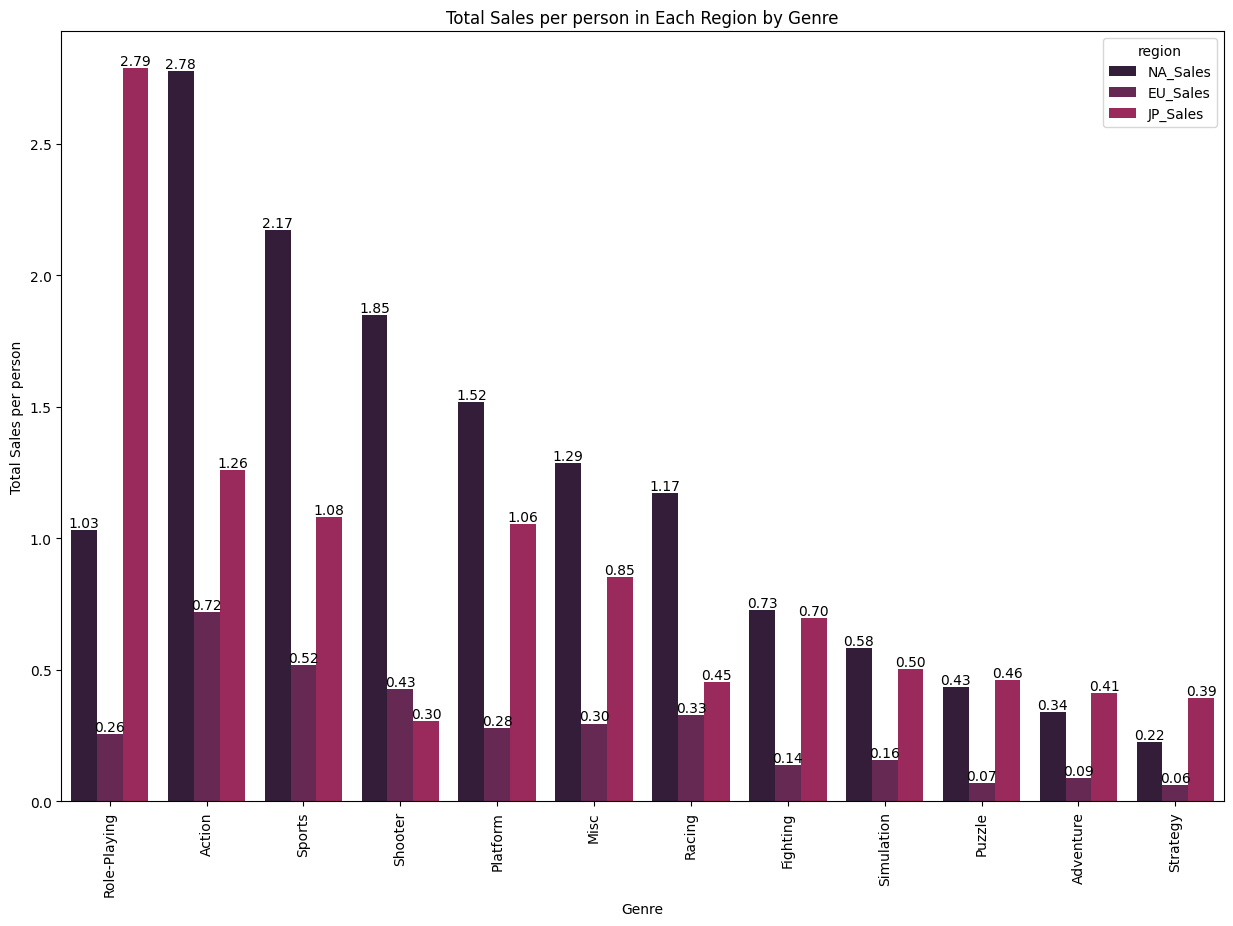

In [48]:
#Graph showing the global sales/population in each genre
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Genre', y='mean_sales', data=sumpopdat, hue='region', hue_order=['NA_Sales', 'EU_Sales', 'JP_Sales'])
ax.set_title('Total Sales per person in Each Region by Genre')
ax.set_ylabel('Total Sales per person')
for container in ax.containers:
  ax.bar_label(container, fmt='{0:.2f}')
plt.xticks(rotation=90)
plt.show()

In [30]:
meanpopdat = popdat[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales']].groupby('Genre').agg('mean')
meanpopdat

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,0.000838,0.000217,0.000380
Adventure,0.000265,0.000068,0.000320
Fighting,0.000859,0.000164,0.000820
Misc,0.000740,0.000170,0.000490
Platform,0.001716,0.000314,0.001191
Puzzle,0.000747,0.000120,0.000794
Racing,0.000938,0.000262,0.000362
Role-Playing,0.000694,0.000173,0.001874
Shooter,0.001412,0.000327,0.000233


In [31]:
meanpopdat = meanpopdat.reset_index()
meanpopdat = pd.melt(meanpopdat, id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='region', value_name='mean_sales')
meanpopdat = meanpopdat.sort_values('mean_sales', ascending=False)
meanpopdat

,Genre,region,mean_sales
31,Role-Playing,JP_Sales,0.001874
4,Platform,NA_Sales,0.001716
8,Shooter,NA_Sales,0.001412
28,Platform,JP_Sales,0.001191
6,Racing,NA_Sales,0.000938
10,Sports,NA_Sales,0.000927
2,Fighting,NA_Sales,0.000859
0,Action,NA_Sales,0.000838
26,Fighting,JP_Sales,0.000820
29,Puzzle,JP_Sales,0.000794


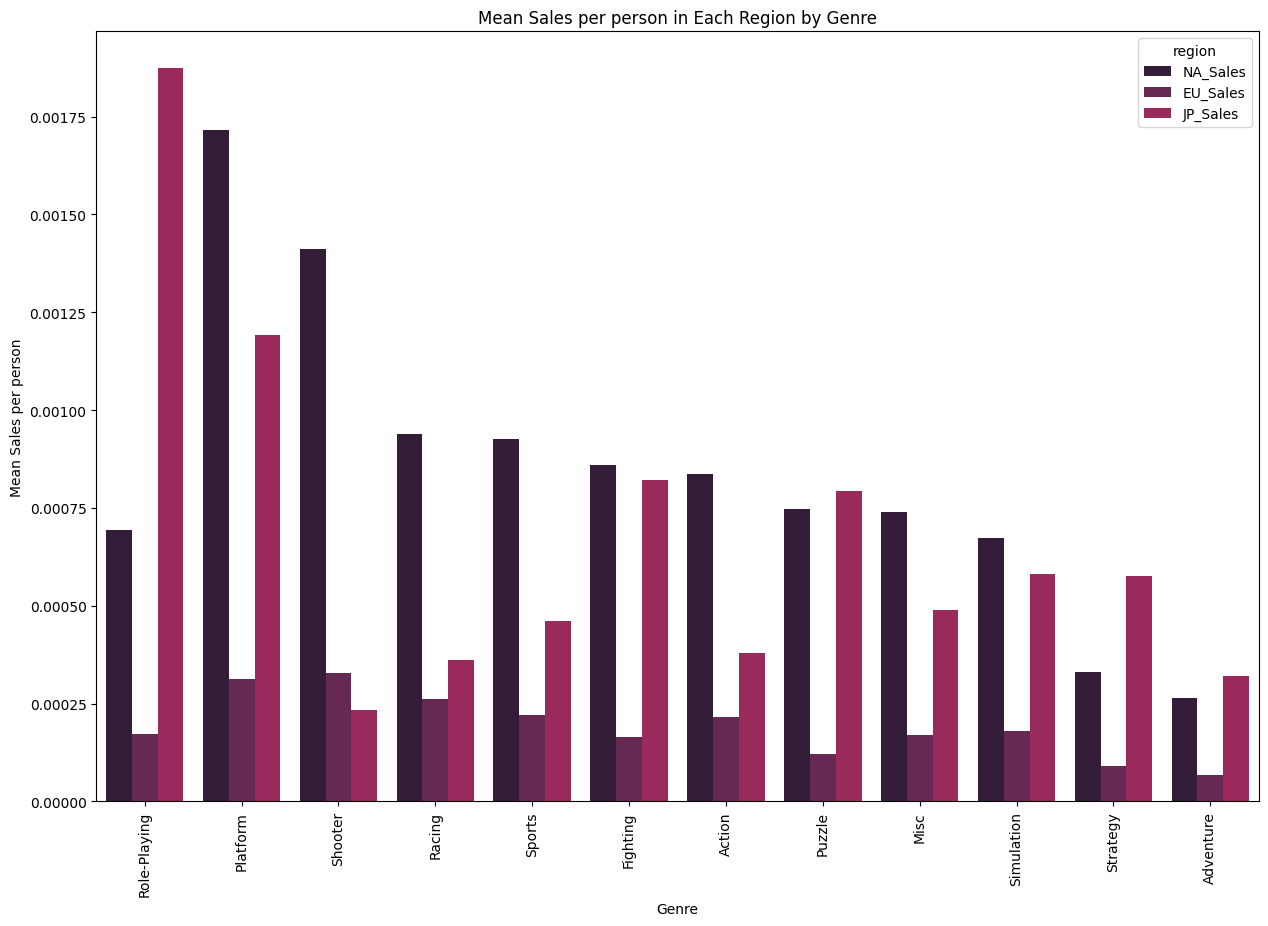

In [47]:
#Graph showing the total global sales in each genre
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Genre', y='mean_sales', data=meanpopdat, hue='region', hue_order=['NA_Sales', 'EU_Sales', 'JP_Sales'])
ax.set_title('Mean Sales per person in Each Region by Genre')
ax.set_ylabel('Mean Sales per person')
plt.xticks(rotation=90)
plt.show()